In [4]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [5]:
df = pd.read_csv('822_aggregated_median.csv')

/Users/mbornhol/miniconda3/envs/cyto_eval/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,Unnamed: 0,Metadata_Aggregate_On,Metadata_Well_Position,Metadata_Plate,Metadata_Well,Metadata_broad_sample,Metadata_moa,Metadata_mmoles_per_liter,Metadata_dose_recode,Metadata_Concentration,...,efficientnet_1270,efficientnet_1271,efficientnet_1272,efficientnet_1273,efficientnet_1274,efficientnet_1275,efficientnet_1276,efficientnet_1277,efficientnet_1278,efficientnet_1279
0,0,well,SQ00014812/A01,SQ00014812,A01,DMSO,unknown,0.0,0,NaN,...,-0.032134,0.090487,-0.077840,-0.072893,0.534853,0.108327,-0.044001,-0.054680,-0.055064,0.202875
1,1,well,SQ00014812/A02,SQ00014812,A02,DMSO,unknown,0.0,0,NaN,...,-0.031902,-0.102801,-0.064692,-0.103176,0.641467,-0.107056,-0.075086,0.804257,-0.079709,0.093561
2,2,well,SQ00014812/A03,SQ00014812,A03,DMSO,unknown,0.0,0,NaN,...,-0.028836,-0.087342,-0.072304,-0.025578,0.898040,-0.053190,-0.061131,0.491449,-0.106924,-0.101056
3,3,well,SQ00014812/A04,SQ00014812,A04,DMSO,unknown,0.0,0,NaN,...,-0.035564,-0.092992,-0.070955,-0.055588,0.738087,-0.056297,-0.073155,1.649449,-0.081452,0.033937
4,4,well,SQ00014812/A05,SQ00014812,A05,DMSO,unknown,0.0,0,NaN,...,-0.060616,-0.085930,-0.042345,-0.037677,0.057674,1.211194,-0.058604,1.059027,-0.081356,0.306628


In [ ]:
e = eval.evaluation(df_path= '822_aggregated_median.csv')
con = e.norm_agg()
res_enr = e.eval(con, operation = 'enrichment')
res_enr

In [9]:
#res_enr.to_csv('822_enr.csv', index=False)

In [10]:
res_pre = e.eval(con, operation = 'precision_recall')
res_pre

,k,precision,recall
0,5.0,0.136842,0.003542
1,10.0,0.131579,0.006531
2,15.0,0.136842,0.009671
3,20.0,0.115789,0.011254
4,25.0,0.107368,0.012609


In [11]:
res = pd.concat([res_enr, res_pre], ignore_index=False, axis=1)
res.to_csv('822_results.csv', index=False)

In [3]:
hit_ls = e.eval(con, operation = 'hit@k')


running hit@k


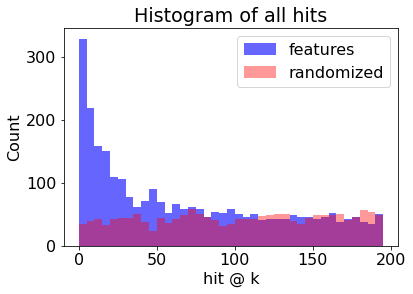

{50: 984, 75: 1063, 100: 1130}

In [8]:
#%matplotlib qt
bins = np.arange(0,200,5)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hit_ls[0], bins, alpha=0.6, color='blue', label='features')
plt.hist(hit_ls[1], bins,alpha=0.4, color='red', label='randomized')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()

hit_ls[2]

In [5]:
# compare to others
e = eval.evaluation(df_path= '../811/811_aggregated_median.csv')
con = e.norm_agg()
comp_enr = e.eval(con, operation = 'enrichment')
res_enr_baseline = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/results/res_enrichment_baseline.csv')

1280 features were identified


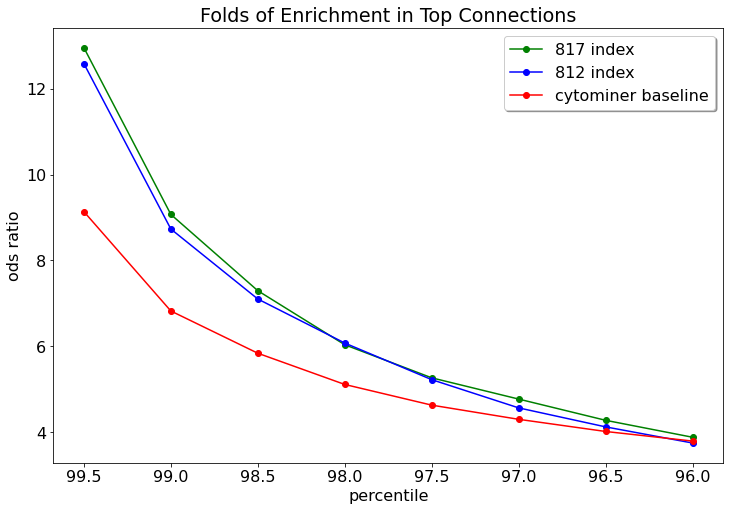

In [6]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res_enr["enrichment_percentile"], res_enr["ods_ratio"], marker="o", color="green", label = '817 index')
plt.plot(100*comp_enr["enrichment_percentile"], comp_enr["ods_ratio"], marker="o", color="blue", label = '812 index')
plt.plot(100*res_enr_baseline["enrichment_percentile"], res_enr_baseline["ods_ratio"], marker="o", color="red", label = 'cytominer baseline')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()